# Implementação CountingSort - Felipe Alves de Sousa
 


Primeiro importaremos as bibliotecas 

In [ ]:
#Importacao das bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

Aqui implementei a minha versao do Counting Sort

In [ ]:
def countingSort(lista):
    tam = len(lista)
    listaOrdenada = [0] * tam

    # Inicializa o vetor contador
    contador = [0] * 10

    # Armazena a contagem de cada elemento na lista contador
    for i in range(0, tam):
        contador[lista[i]] += 1

    # Armazena a contagem acumulativa na lista contador
    for i in range(1, 10):
        contador[i] += contador[i - 1]

    # Acha o index de cada elemento da lista original no contador e coloca
    # os elementos na listaOrdenada
    i = tam - 1
    while i >= 0:
        listaOrdenada[contador[lista[i]] - 1] = lista[i]
        contador[lista[i]] -= 1
        i -= 1

    # Copia a listaOrdenada pra lista original
    for i in range(0, tam):
        lista[i] = listaOrdenada[i]


In [ ]:
#Testando a funcionalidade
teste=np.array([4,5,6,10,20])

for x in range (len(teste)):

  lista = np.random.randint(10,size=(teste[x]))

  print("LISTA ANTES DA ORDENACAO",teste[x],"elementos:")
  print(lista)

  countingSort(lista)

  print("LISTA DEPOIS DA ORDENACAO",teste[x],"elementos:")
  print(lista,"\n")

LISTA ANTES DA ORDENACAO 4 elementos:
[1 7 1 9]
LISTA DEPOIS DA ORDENACAO 4 elementos:
[1 1 7 9] 

LISTA ANTES DA ORDENACAO 5 elementos:
[4 4 6 5 7]
LISTA DEPOIS DA ORDENACAO 5 elementos:
[4 4 5 6 7] 

LISTA ANTES DA ORDENACAO 6 elementos:
[2 0 7 2 8 1]
LISTA DEPOIS DA ORDENACAO 6 elementos:
[0 1 2 2 7 8] 

LISTA ANTES DA ORDENACAO 10 elementos:
[1 7 1 7 2 2 4 2 7 6]
LISTA DEPOIS DA ORDENACAO 10 elementos:
[1 1 2 2 2 4 6 7 7 7] 

LISTA ANTES DA ORDENACAO 20 elementos:
[7 9 3 1 2 8 4 6 5 9 5 9 6 4 9 2 3 0 9 6]
LISTA DEPOIS DA ORDENACAO 20 elementos:
[0 1 2 2 3 3 4 4 5 5 6 6 6 7 8 9 9 9 9 9] 



# Testes

Agora vamo aos testes para os valores de 1k ate 15k de elementos quanto sera que o CountingSort demora para executar ?

In [ ]:
#Irei iniciar com array com os numeros de elementos que usaremos em cada teste
testes=np.array([10000,20000,30000,40000,50000,80000,100000])
#Tambem irei criar um array para armazenar o resultado em segundos de cada teste
resultados=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])

#Com esse for conseguiremos testar nosso BubbleSort com os valores de 1k ate 15k de elementos
for x in range (len(testes)):
  #Primeiro iremos iniciar um vetor do tamanho da vez(indicado por testes[x])
  lista = np.random.randint(10,size=(testes[x]))

  #Temporizador 
  inicio = perf_counter()
  countingSort(lista)
  fim = perf_counter()


  resultados[x]=fim-inicio
  #O tempo sera armazenado em vetor na mesma posicao do teste que esta sendo feito
  resultados[x]=round(resultados[x],5)

  print("Para ",testes[x]," elementos foi gasto",resultados[x],"segundos")

Para  10000  elementos foi gasto 0.01312 segundos
Para  20000  elementos foi gasto 0.02608 segundos
Para  30000  elementos foi gasto 0.02935 segundos
Para  40000  elementos foi gasto 0.04542 segundos
Para  50000  elementos foi gasto 0.04955 segundos
Para  80000  elementos foi gasto 0.08098 segundos
Para  100000  elementos foi gasto 0.10652 segundos


# Plotando gráfico comparativo

Por fim utilizarei o matplotlib para plotar um grafico com as comparações entre Nº de Elementos e Tempos necessario para executar o CountingSort

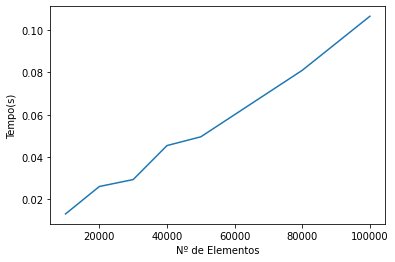

In [ ]:
plt.plot(testes,resultados)
plt.ylabel('Tempo(s)')
plt.xlabel('Nº de Elementos')
plt.show()

# Pior caso


O pior caso desse algoritmo é quando o nosso vetor contador[] é muito grande

In [ ]:
def countingSort2(lista):
    tam = len(lista)
    listaOrdenada = [0] * tam
    #vamos aumentar o vetor contador
    contador = [0] * 100000

    for i in range(0, tam):
        contador[lista[i]] += 1
    for i in range(1, 10):
        contador[i] += contador[i - 1]
    i = tam - 1
    while i >= 0:
        listaOrdenada[contador[lista[i]] - 1] = lista[i]
        contador[lista[i]] -= 1
        i -= 1
    for i in range(0, tam):
        lista[i] = listaOrdenada[i]


testes=np.array([10000,20000,30000,40000,50000,80000,100000])
resultados2=np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])

for x in range (len(testes)):
  
  listaPiorCaso = np.random.randint(100000,size=(testes[x]))
  
  inicio = perf_counter()
  countingSort2(listaPiorCaso)
  fim = perf_counter()


  resultados2[x]=fim-inicio
  resultados2[x]=round(resultados2[x],5)

  print("Para ",testes[x]," elementos foi gasto",resultados2[x],"segundos")

Para  10000  elementos foi gasto 0.00902 segundos
Para  20000  elementos foi gasto 0.01904 segundos
Para  30000  elementos foi gasto 0.03388 segundos
Para  40000  elementos foi gasto 0.05386 segundos
Para  50000  elementos foi gasto 0.05604 segundos
Para  80000  elementos foi gasto 0.11242 segundos
Para  100000  elementos foi gasto 0.10319 segundos


Vamos agora ver o gráfico do pior caso

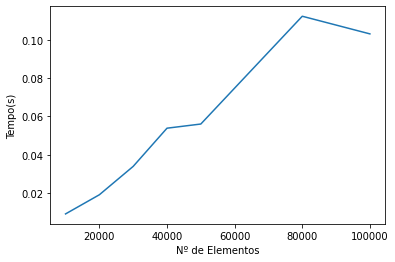

In [ ]:
plt.plot(testes,resultados2)
plt.ylabel('Tempo(s)')
plt.xlabel('Nº de Elementos')
plt.show()

# Comparativo entre Pior Caso e listas com números aleatórios

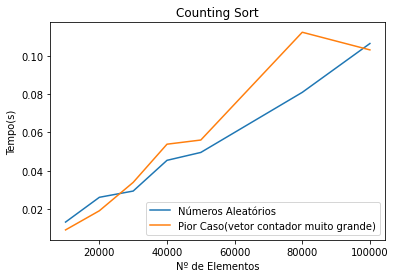

In [ ]:
x = testes

plt.plot(x, resultados, label='Números Aleatórios')
plt.plot(x, resultados2, label='Pior Caso(vetor contador muito grande)')  
plt.ylabel('Tempo(s)')
plt.xlabel('Nº de Elementos')
plt.title("Counting Sort")
plt.legend();

